In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
# 0 refers to positive sentiment, 1 is negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot:>

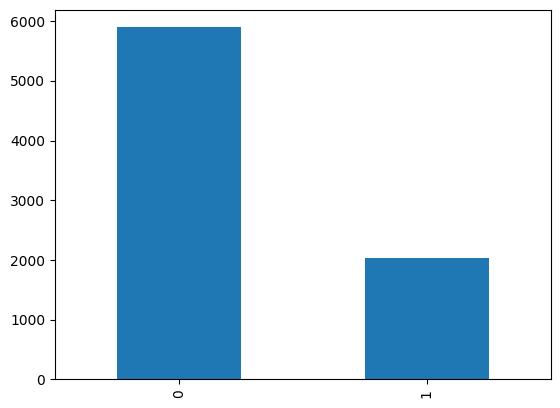

In [8]:
# plot the label counts 
data['label'].value_counts().plot(kind='bar')

# Data Cleaning

In [9]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [10]:
import re

In [11]:
# Substitute 's with " is" 
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [12]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [14]:
# remive the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [18]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [19]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [20]:
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
len(nltk_stopwords)

179

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
sklearn_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [23]:
len(sklearn_stopwords)

318

In [24]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'should', 'he', 'such', 'at', 'which', 'here', 'during', 'been', 'herself', 'to', 'each', 'same', 'all', 'how', 'own', 'before', 'had', 'myself', 'this', 'your', 'if', 'in', 'these', 'on', 'through', 'against', 'further', 'her', 'his', 'no', 'be', 'him', 'they', 'as', 'it', 'himself', 'we', 'ourselves', 'any', 'because', 'above', 'our', 'their', 'of', 'the', 'who', 'them', 'then', 'themselves', 'that', 'i', 'up', 'more', 'are', 'being', 'most', 'not', 'from', 'will', 'very', 'below', 'under', 'so', 'again', 'its', 'or', 'yourselves', 'between', 'is', 'hers', 'for', 'after', 'other', 'until', 'yourself', 'have', 'down', 'why', 'both', 'over', 'and', 'can', 'while', 'some', 'there', 'do', 'whom', 'my', 'with', 'were', 'when', 'now', 'yours', 'she', 'has', 'too', 'but', 're', 'am', 'ours', 'once', 'where', 'out', 'than', 'me', 'what', 'an', 'only', 'off', 'a', 'itself', 'you', 'about', 'few', 'nor', 'those', 'by', 'was', 'into'}


In [25]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [26]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [27]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [29]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent    

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [32]:
# !pip install contractions

In [33]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [34]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

# Define the Cleaner Function

In [35]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [36]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

cleaned_tweets    

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ',
 'iphone software update fucked up my phone big time stupid iphones ',
 'happy for u instapic instadaily u sony xperia xperiaz ',
 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ',
 'bout to go shopping again listening to music iphone justme music likeforlike followforfollow ',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ',
 'h

In [37]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [38]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [39]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [40]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [41]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# Data Visualization

Plot the top 25 most common words in this tweets dataset

In [42]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [43]:
import matplotlib.pyplot as plt

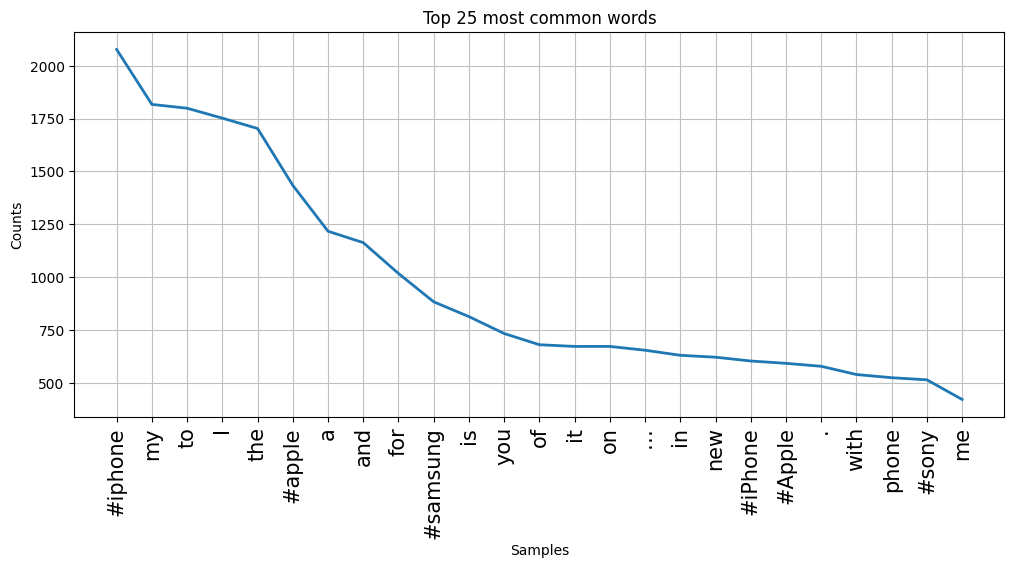

In [44]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## Plot for Cleaned Tweets

## After applying Stop words

In [49]:
type(combined_stopwords)

set

# Bag of Words Model (Feature Extraction)

In [63]:
data.shape

(7920, 4)

In [153]:
df = data.copy()
df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
df.to_pickle('cleaned_tweets.pkl')
df.to_csv('cleaned_tweets', index=False)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets'])
CV_features.shape

(7920, 13630)

In [65]:
CV_features[0]

<1x13630 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [66]:
type(CV_features[0])  # each row is a compressed spare row 

scipy.sparse.csr.csr_matrix

In [67]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df

,0,1,2,3,4,5,6,7,8,9,...,13620,13621,13622,13623,13624,13625,13626,13627,13628,13629
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df.size/1e6  # these many elements/numbers are presnt in the df

107.9496

In [70]:
import numpy as np
np.count_nonzero(df)

73960

In [71]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.0685134544268807

In [72]:
CV.get_feature_names_out()[:50]

array(['aaaahhhhhhh', 'aah', 'aalborg', 'aand', 'aapl', 'aarhus', 'aaron',
       'aarp', 'aarrrggghhhh', 'aashamsakal', 'aayp', 'ab', 'abah',
       'abareta', 'abb', 'abc', 'abdou', 'abe', 'aber', 'abercrombie',
       'abi', 'ability', 'abit', 'able', 'ableton', 'aboard',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight',
       'abscbn', 'absence', 'absolute', 'absolutely', 'absurd', 'abu',
       'abudhabi', 'abuja', 'abujacity', 'abujafct', 'abujapeople',
       'abujaphones', 'abuse', 'academia', 'academic', 'academy', 'acc',
       'accelerate', 'accept', 'acceptable'], dtype=object)

In [73]:
len(CV.get_feature_names_out())

13630

In [74]:
CV_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'fuckin', 'hey', 'inch', 'ipod', 'make',
        'minite', 'new', 'thinner'], dtype='<U41')]

# Model building

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [84]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.5)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      

0.8909090909090909
0.8636363636363636


In [85]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [86]:
X = CV_features
y = data['label']

In [87]:
## crOSS VALIDATE THE LR2 model

LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.06)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR2, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

[0.87941919 0.8510101  0.84785354 0.86426768 0.86679293]
86.19 1.14


In [88]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR2, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [89]:
results

{'fit_time': array([0.01562262, 0.01561928, 0.02213001, 0.03125048, 0.01562238]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.01562119]),
 'test_score': array([0.87941919, 0.8510101 , 0.84785354, 0.86426768, 0.86679293]),
 'train_score': array([0.8833649 , 0.88652146, 0.88620581, 0.88557449, 0.8833649 ])}

In [90]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.8833649  0.88652146 0.88620581 0.88557449 0.8833649 ]
88.5 0.14


In [91]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.87941919 0.8510101  0.84785354 0.86426768 0.86679293]
86.19 1.14


In [92]:
## Hyper parameter tuning of the LR2 model
from sklearn.model_selection import GridSearchCV

LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR2, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [93]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [94]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.80001}, 0.8808080808080808, 16)

In [95]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [96]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

88.08080808080808

In [97]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

95.46717171717172

In [98]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.8724007409153909

In [99]:
grid_results.cv_results_['mean_test_score']

array([0.77184343, 0.85896465, 0.86994949, 0.87386364, 0.87638889,
       0.87815657, 0.87891414, 0.88030303, 0.87992424, 0.88042929,
       0.88042929, 0.88030303, 0.88068182, 0.87992424, 0.88042929,
       0.88068182, 0.88080808, 0.88042929, 0.88017677, 0.88005051])

In [100]:
grid_results.cv_results_['mean_train_score']

array([0.77607323, 0.87979798, 0.90069444, 0.91344697, 0.91982323,
       0.92528409, 0.93039773, 0.93418561, 0.93775253, 0.9407197 ,
       0.94315025, 0.9459596 , 0.94810606, 0.94981061, 0.95160985,
       0.95315657, 0.95467172, 0.95593434, 0.95719697, 0.9584596 ])

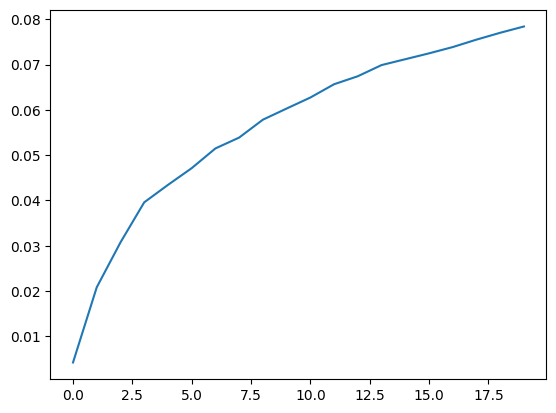

In [101]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [102]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [103]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [104]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([0.0042298 , 0.02083333, 0.03074495, 0.03958333, 0.04343434,
       0.04712753, 0.05148359, 0.05388258, 0.05782828, 0.0602904 ,
       0.06272096, 0.06565657, 0.06742424, 0.06988636, 0.07118056,
       0.07247475, 0.07386364, 0.07550505, 0.0770202 , 0.07840909])

In [105]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets']
y = data['label']

CV = CountVectorizer()
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.15)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR2)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

87.39 1.15


In [106]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.15, class_weight='balanced', solver='liblinear')}

In [107]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.15, class_weight='balanced',
                                    solver='liblinear'))])

In [108]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

13630

In [109]:
CV_pipe['CV'].vocabulary_

{'fingerprint': 3952,
 'pregnancy': 9382,
 'test': 11973,
 'android': 381,
 'apps': 572,
 'beautiful': 1062,
 'cute': 2661,
 'health': 5149,
 'igers': 5570,
 'iphoneonly': 6108,
 'iphonesia': 6121,
 'iphone': 6073,
 'finally': 3937,
 'transparant': 12350,
 'silicon': 10819,
 'case': 1899,
 'thanks': 12004,
 'uncle': 12609,
 'yay': 13489,
 'sony': 11118,
 'xperia': 13448,
 'sonyexperias': 11128,
 'love': 7128,
 'talk': 11802,
 'makememories': 7296,
 'unplug': 12667,
 'relax': 9927,
 'smartphone': 10979,
 'wifi': 13225,
 'connect': 2372,
 'wired': 13268,
 'know': 6594,
 'george': 4510,
 'way': 13052,
 'daventry': 2751,
 'home': 5312,
 'amazing': 325,
 'service': 10610,
 'apple': 492,
 'question': 9655,
 'unless': 12656,
 'pay': 8878,
 'stupid': 11528,
 'support': 11651,
 'software': 11073,
 'update': 12689,
 'fucked': 4281,
 'big': 1224,
 'time': 12174,
 'iphones': 6117,
 'happy': 5027,
 'instapic': 5953,
 'instadaily': 5841,
 'xperiaz': 13461,
 'new': 8209,
 'type': 12553,
 'charger': 2

# LR Model without vs with stop_words ??